### Homework 6

Instructions:

For each of the problems below, Add the following things:
- Code to solve the problem
- Proof of acceptance/attempt (screenshot/link)
- Time Complexity
- Space Complexity
- Thought Process / Reflection on Challenges Faced
- Time Taken for that problem (leetcode provides builtin timer functionality)

**Problem 1:**
Flood fill (20)

In [ ]:
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]:
        
        source = image[sr][sc]
        visit = set()
        rows, cols = len(image), len(image[0])
        
        def dfs(r, c):
        
            if min(r, c) < 0 or r >= rows or c >= cols:
                return
        
            if source != image[r][c] or image[r][c] == color:
                return
        
            image[r][c] = color
            dfs(r - 1, c)
            dfs(r + 1, c)
            dfs(r, c + 1)
            dfs(r, c - 1)

        dfs(sr, sc)
        return image

Proof of Acceptance / Attempt:

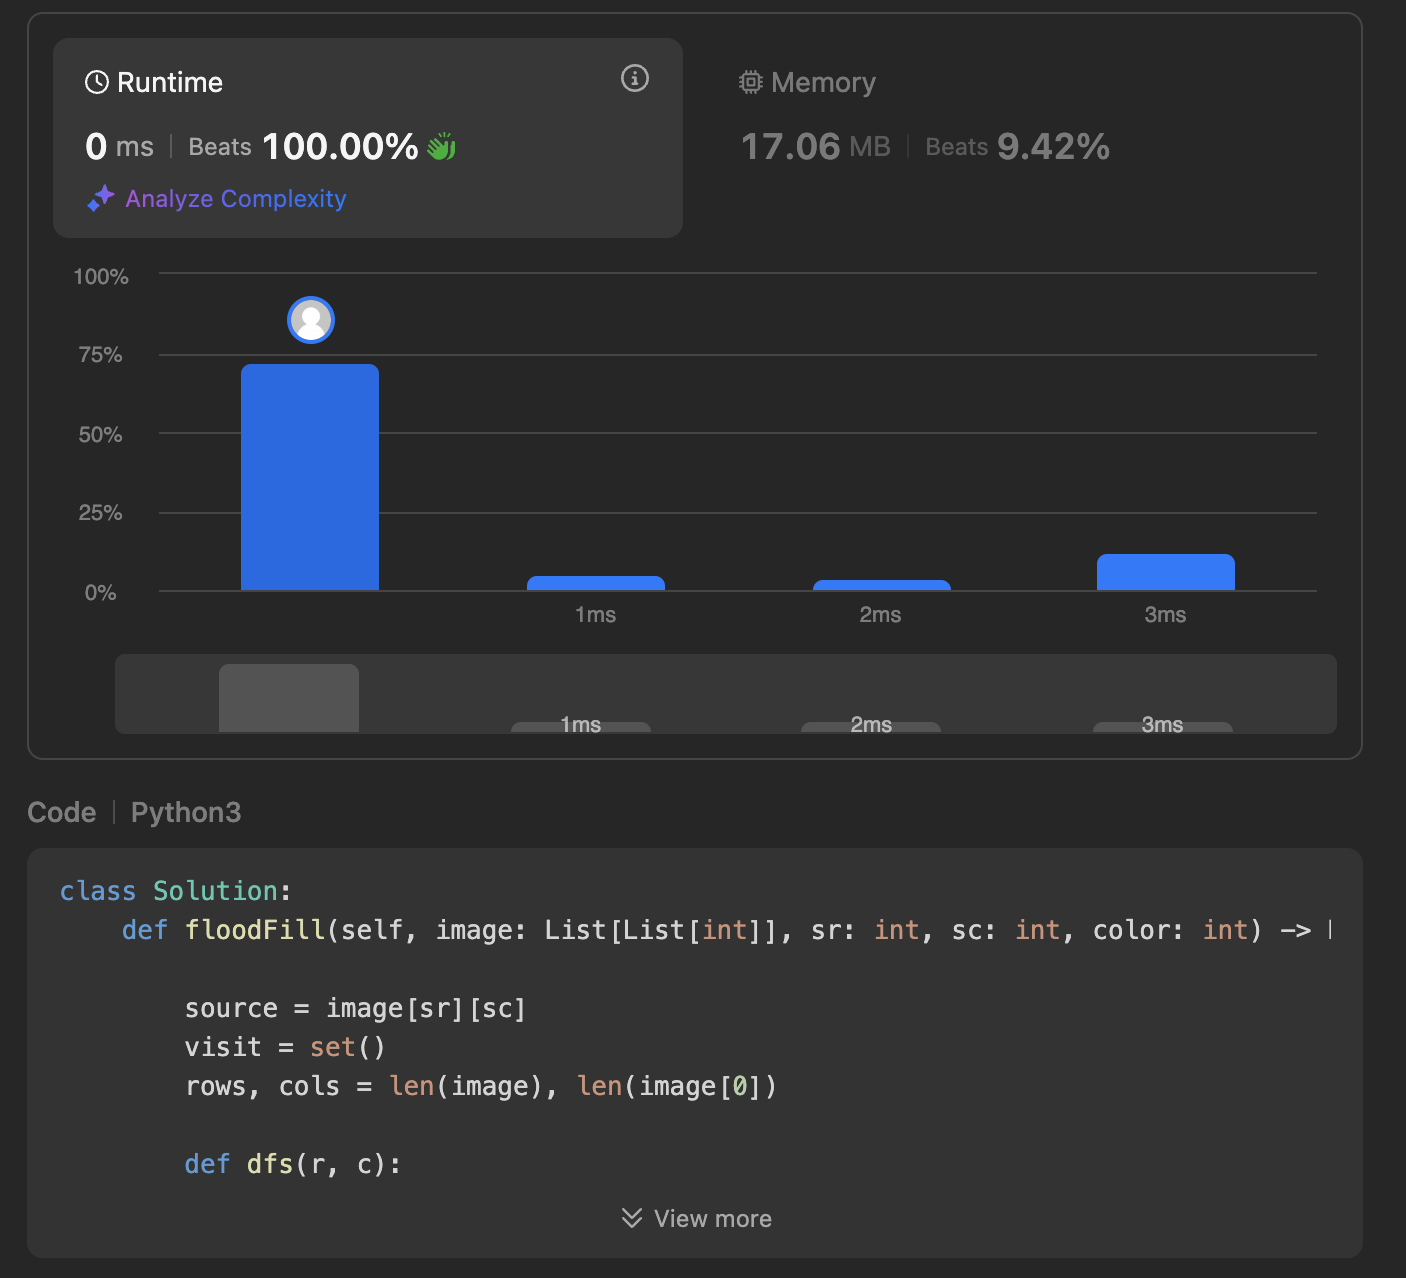

Thought Process / Reflection on challenges faced:

I opted for a DFS approach from the beginning to explore all connected pixels with the same initial color and change them to the target color.One challenge I faced was handling edge cases, like when the starting pixel already had the target color or when navigating out of bounds. By carefully managing the recursive DFS calls and ensuring I didn’t revisit already colored pixels, I was able to ensure the algorithm worked for all the test cases.

Time Complexity

O(N)

Space Complexity

O(N)

Time Taken

47 minutes

**Problem 2:**
Perimeter of island (20)

In [ ]:
class Solution:
    def islandPerimeter(self, grid: List[List[int]]) -> int:
        rows = len(grid)
        cols = len(grid[0])

        ans = 0

        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    ans += 4
                    if i < rows - 1 and grid[i + 1][j] == 1:
                        ans -= 2
                    if j < cols - 1 and grid[i][j + 1] == 1:
                        ans -= 2
       
        return ans

Proof of Acceptance / Attempt:

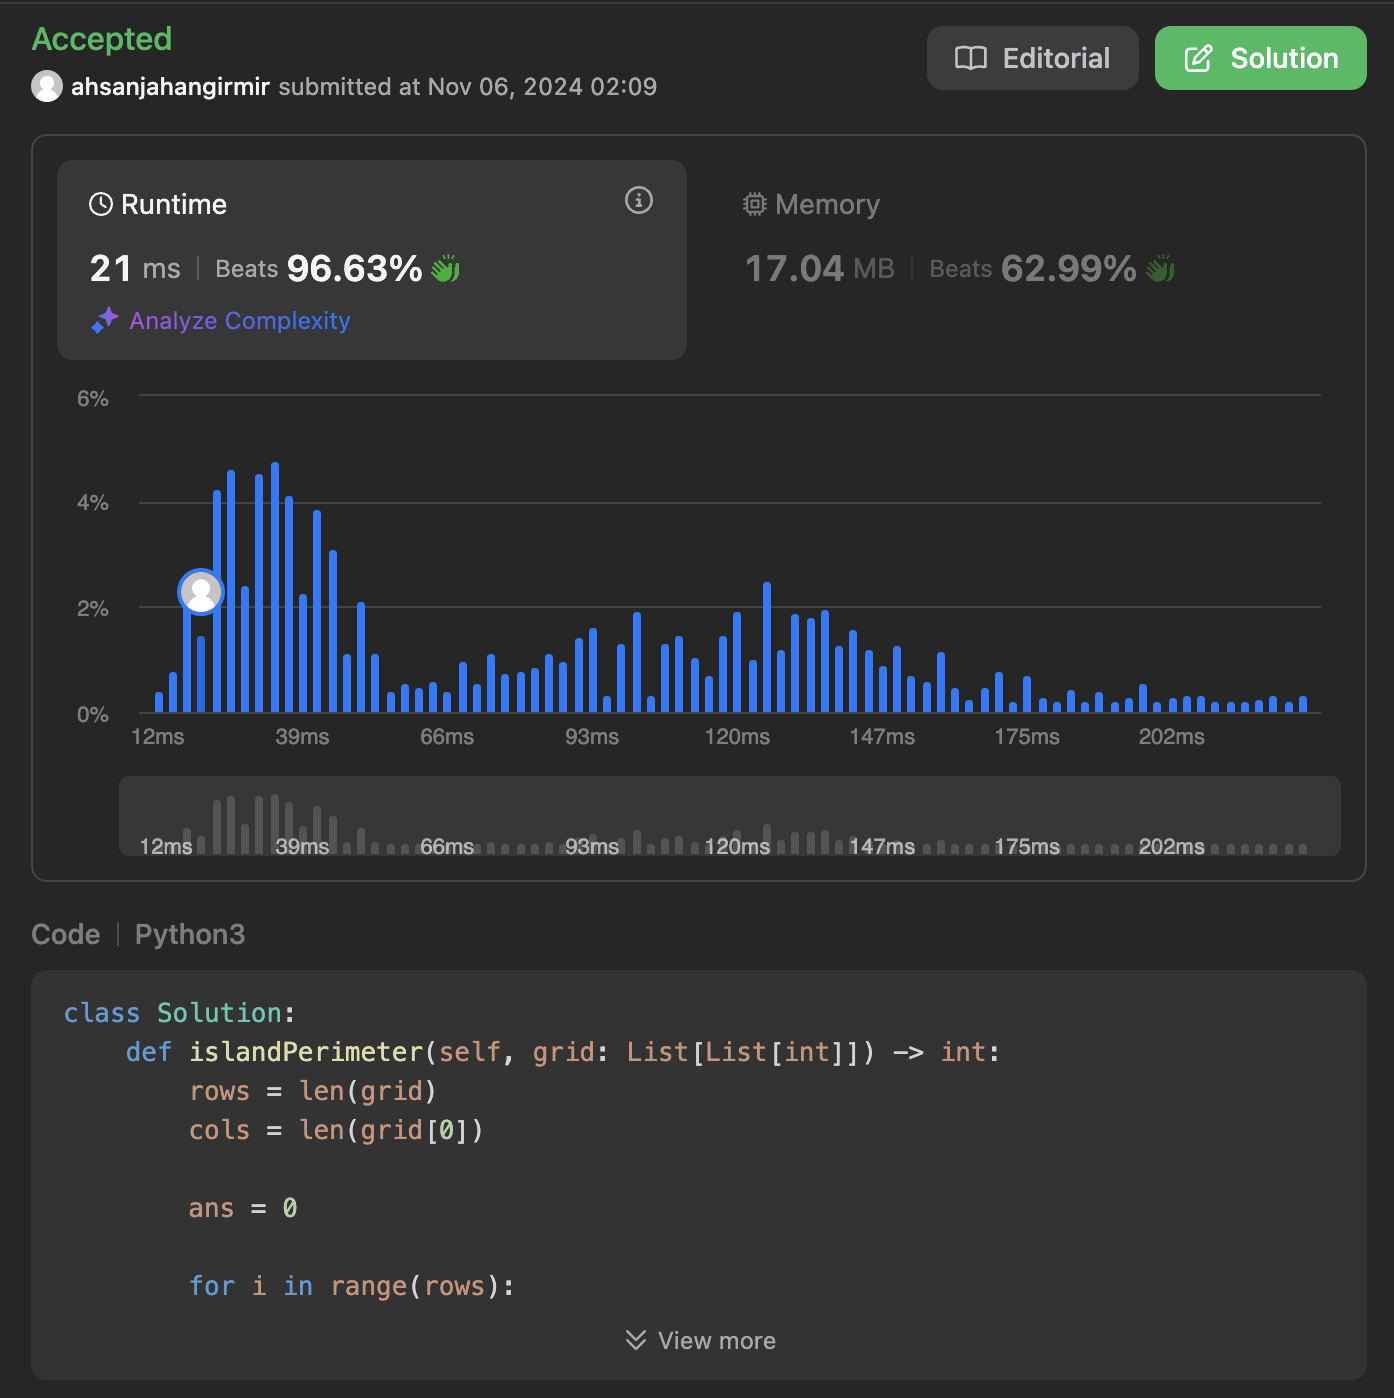

Thought Process / Reflection on challenges faced:

I focused on counting the contribution of each land cell and its shared edges. I started by assuming each land cell contributes 4 to the perimeter, then reduced it by 2 for every adjacent land cell to avoid double-counting shared edges.The main challenge in this problem for me was ensuring that only valid neighboring cells were checked, especially near grid boundaries. By carefully iterating through the grid and adjusting the perimeter based on neighboring land cells, I was able to arrive at an efficient solution without needing to explore the entire island's shape recursively.

Time Complexity

O(m * n) where m is the number of rows and n is the number of columns in the grid. 

Space Complexity

O(1)

Time Taken

21 minutes

**Problem 3:**
Coloring a border (20)

In [ ]:
class Solution:
    def colorBorder(self, grid: List[List[int]], row: int, col: int, color: int) -> List[List[int]]:
        R, C = len(grid), len(grid[0])
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        queue = deque()
        queue.append((row, col))
        visited = set((row, col))
        borders = list()
        while queue:
            x, y = queue.popleft()
            for dx, dy in directions:
                nx, ny = dx+x, dy+y
                if 0<=nx<R and 0<=ny<C and grid[nx][ny] == grid[x][y]: # (x, y) is not on border
                    if (nx, ny) not in visited:
                        queue.append((nx, ny))
                        visited.add((nx, ny))
                else: #  (x, y) is on border
                    borders.append((x, y))
        for x, y in borders:
            grid[x][y] = color
        return grid

Proof of Acceptance / Attempt:

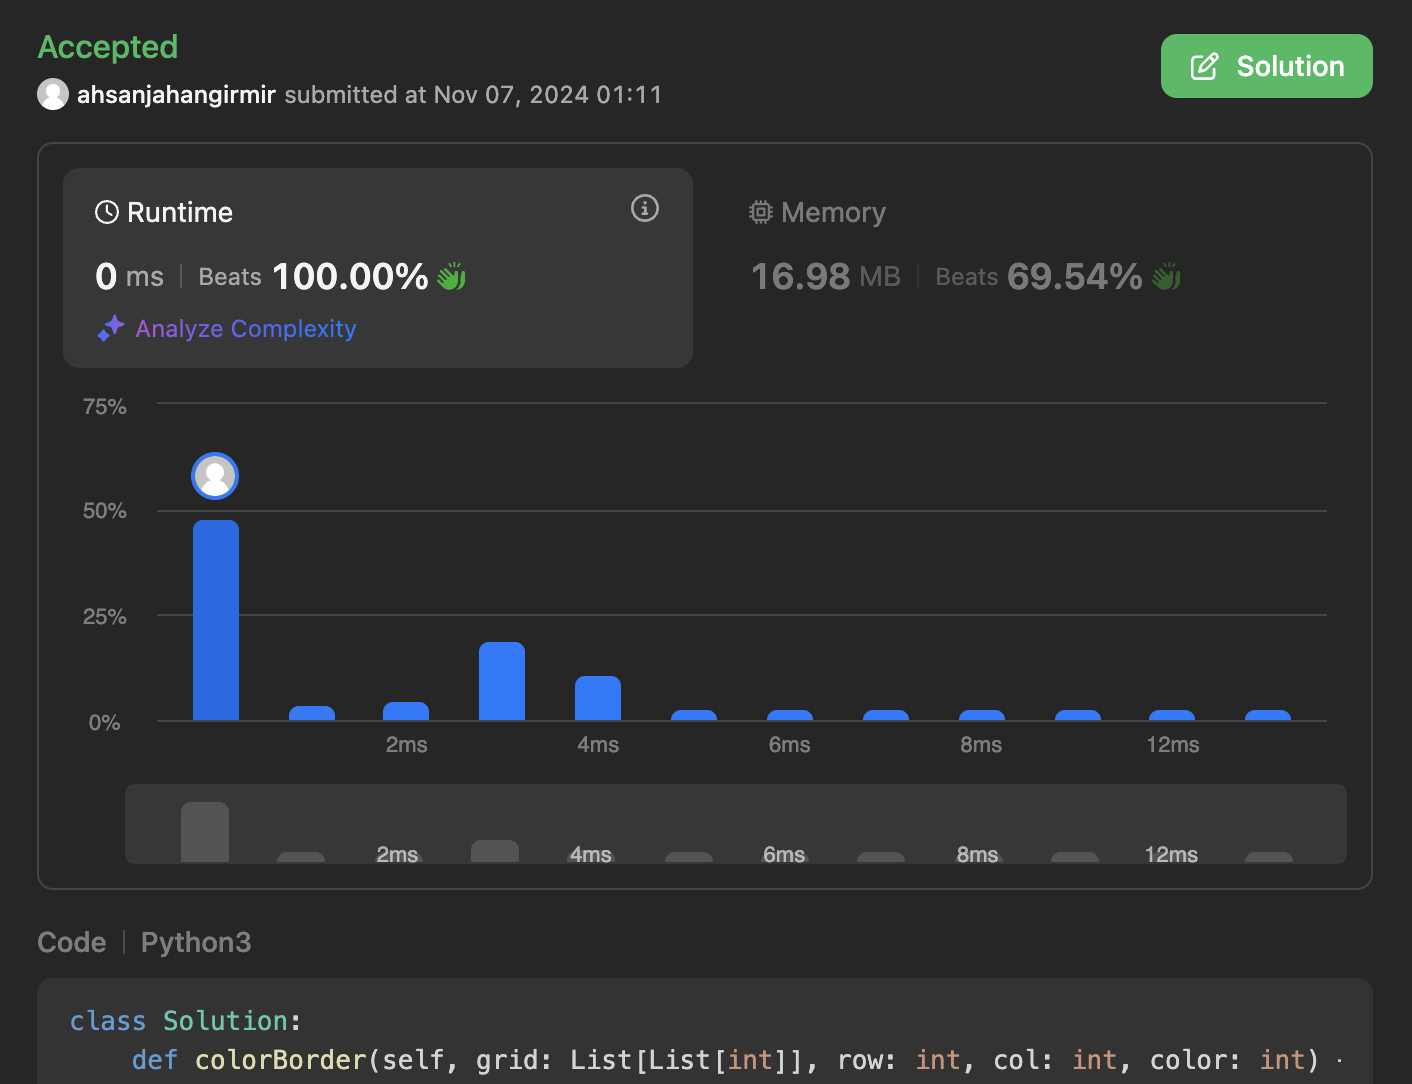

Thought Process / Reflection on challenges faced:

Identifying the border cells required careful consideration of their neighbors. I decided to use BFS to traverse the connected component starting from the given cell, marking each cell as visited to avoid recounting it. The main challenge in this problem was distinguishing between border and non-border cells. I had to check if any neighbor of a cell either had a different value or was out of bounds, which would qualify it as a border. Once the borders were identified, applying the new color was straightforward. BFS worked well here for systematically exploring the grid and ensuring all connected cells were processed.

Time Complexity

O(R * C)

Space Complexity

 O(R * C)

Time Taken

41 minutes

**Problem 4:**
 House Robber (20)

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:

        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        if n == 2:
            return max(nums[0], nums[1])
        dp = [0] * n
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1]) 
        for i in range(2, n):
            dp[i] = max(nums[i] + dp[i - 2], dp[i - 1])
        return max(dp[n - 1], dp[n - 2])

Proof of Acceptance / Attempt:

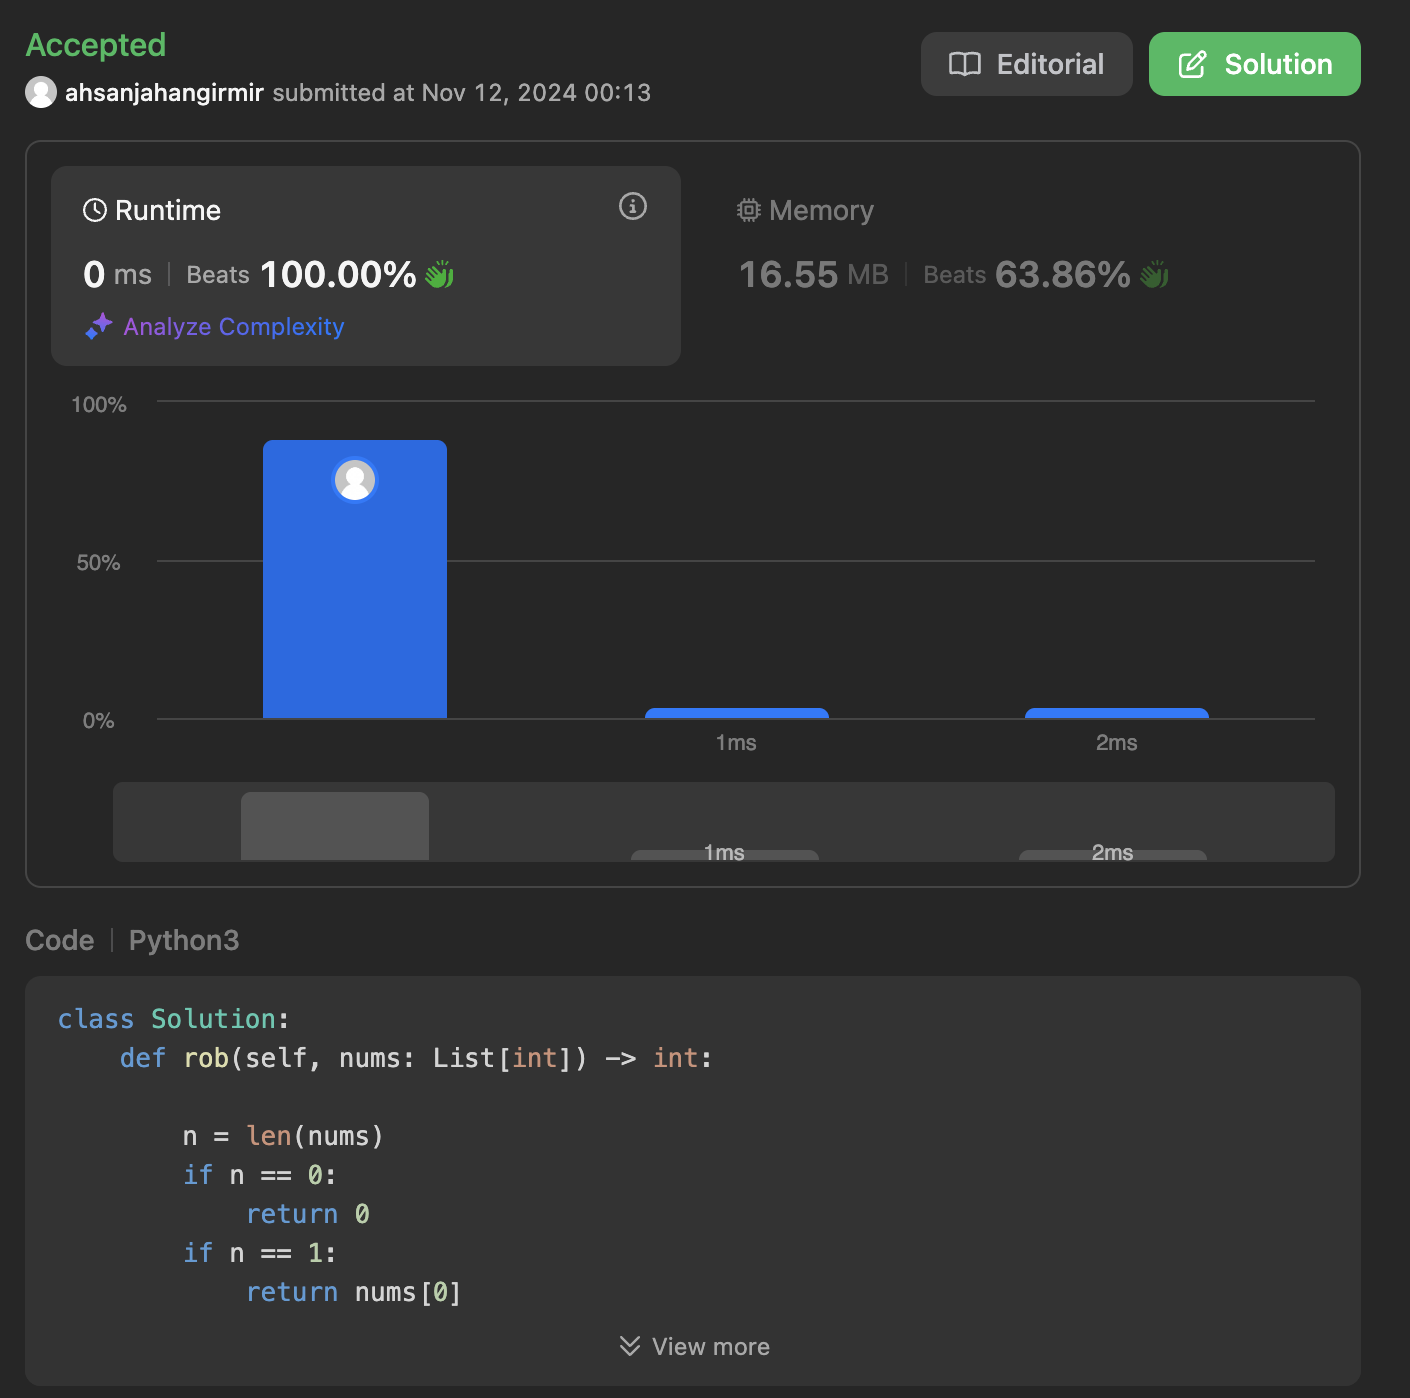

Thought Process / Reflection on challenges faced:

This was a popular problem and i had previously seen it in the algorithms course so it wasnt much difficult to start thinking about the solution. The only difficulty when mapping out the solution was in balancing between robbing the current house and skipping it to maintain the maximum profit. By using a DP array to store the maximum amount that can be robbed up to each house, I was able to efficiently calculate the optimal solution for each subproblem. It took some time to properly handle edge cases like arrays with one or two houses, but once I did, the solution came together smoothly.

Time Complexity: O(N)

Space Complexity: O(N)

Time taken

18 minutes

**Problem 5:**
Longest palindromic substrings (20)


In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        if s == s[::-1]:
            return s
        
        n = len(s)
        start, size = 0, 1
        for i in range(1, n):
            l, r = i - size, i + 1
            s1, s2 = s[l-1: r], s[l: r]

            if s1 == s1[::-1] and l - 1 >= 0:
                start, size = l - 1, size + 2
            elif s2 == s2[::-1]:
                start, size = l, size + 1
        return s[start:start + size]

Proof of Acceptance / Attempt:

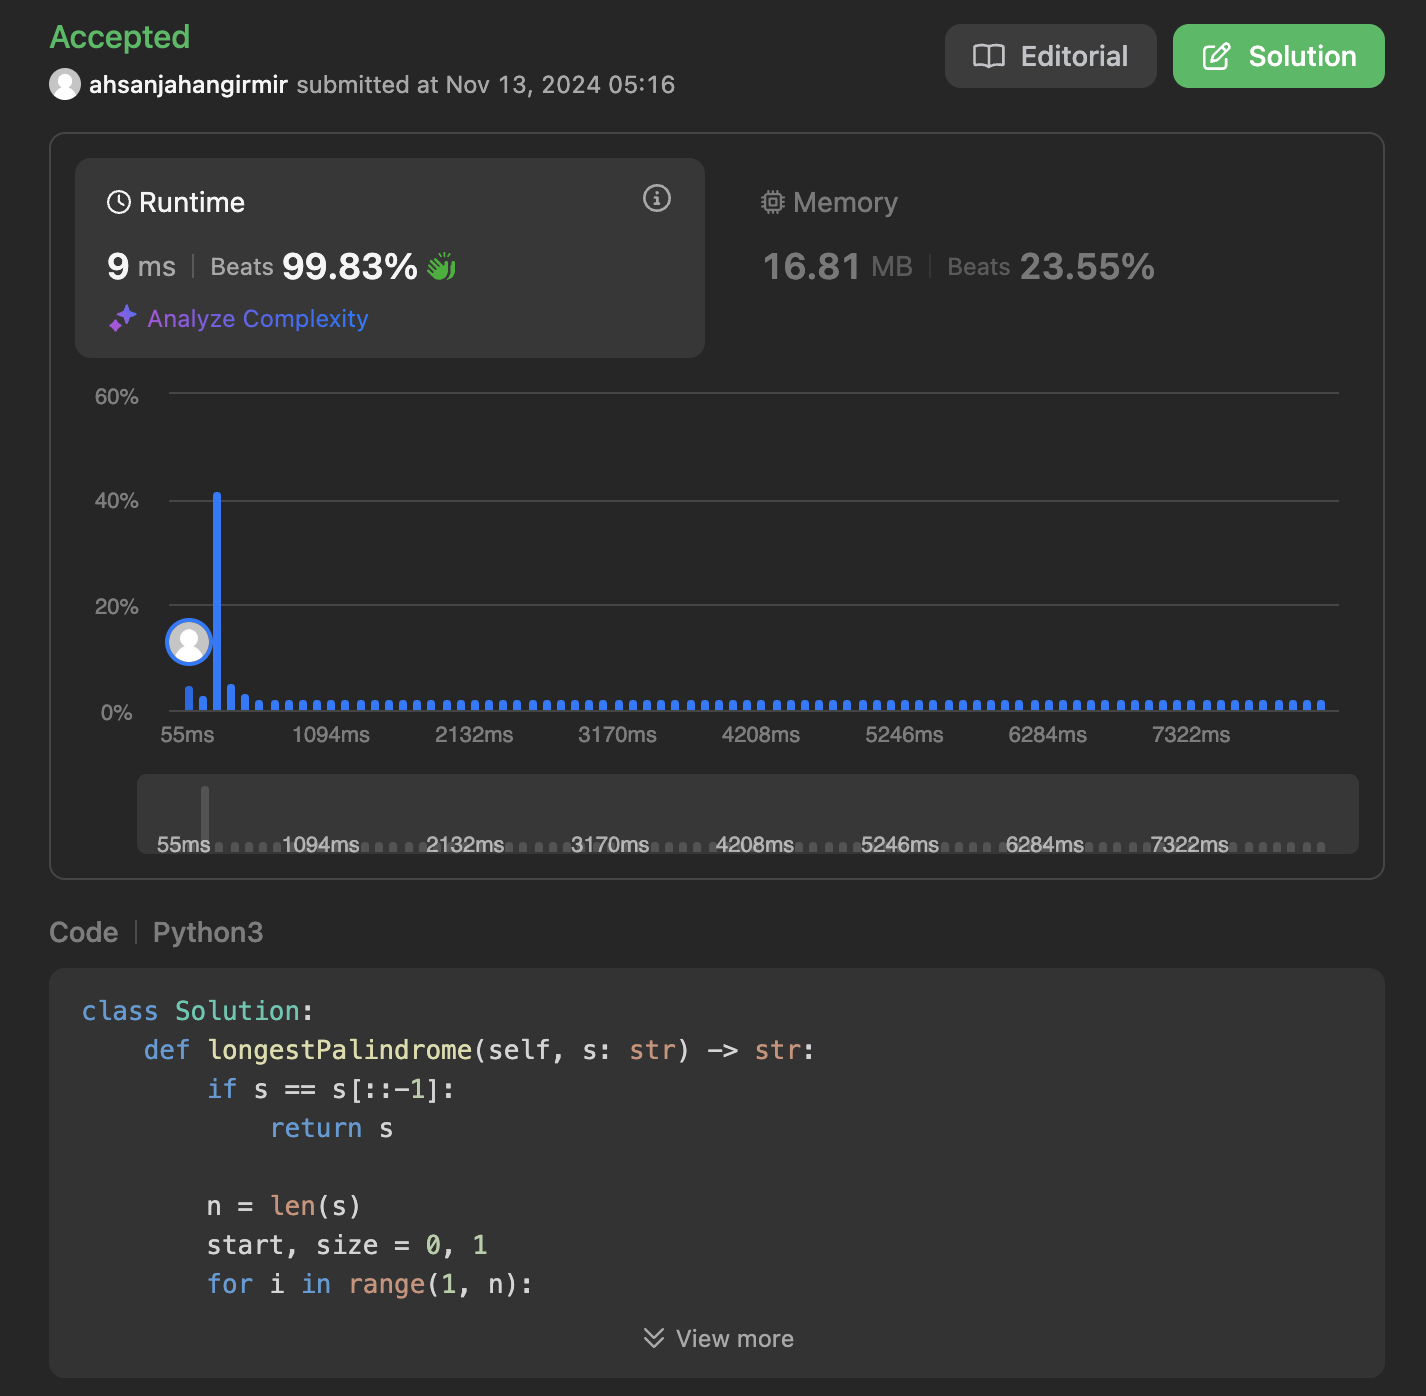

Thought Process / Reflection on challenges faced:

my first thought was to use a brute-force approach, checking all possible substrings. However, I realized this would be inefficient for larger strings. Instead, I opted for an iterative approach that expands potential palindromic centers.The key challenge was managing the odd and even length palindromes simultaneously. By checking substrings centered around each character and comparing them efficiently, I was able to update the start and size of the longest palindrome dynamically. 

Time Complexity: O(N^2)

Space Complexity: O(1)

Time taken: 34 minutes

**Problem 6:**
Decode ways (20)


In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        if not s or s[0] == '0':
            return 0

        n = len(s)
        dp = [0] * (n + 1)
        dp[0] = 1  
        dp[1] = 1  

        for i in range(2, n + 1):
            if 1 <= int(s[i - 1:i]) <= 9:
                dp[i] += dp[i - 1]
            if 10 <= int(s[i - 2:i]) <= 26:
                dp[i] += dp[i - 2]

        return dp[n]


Proof of Acceptance / Attempt:

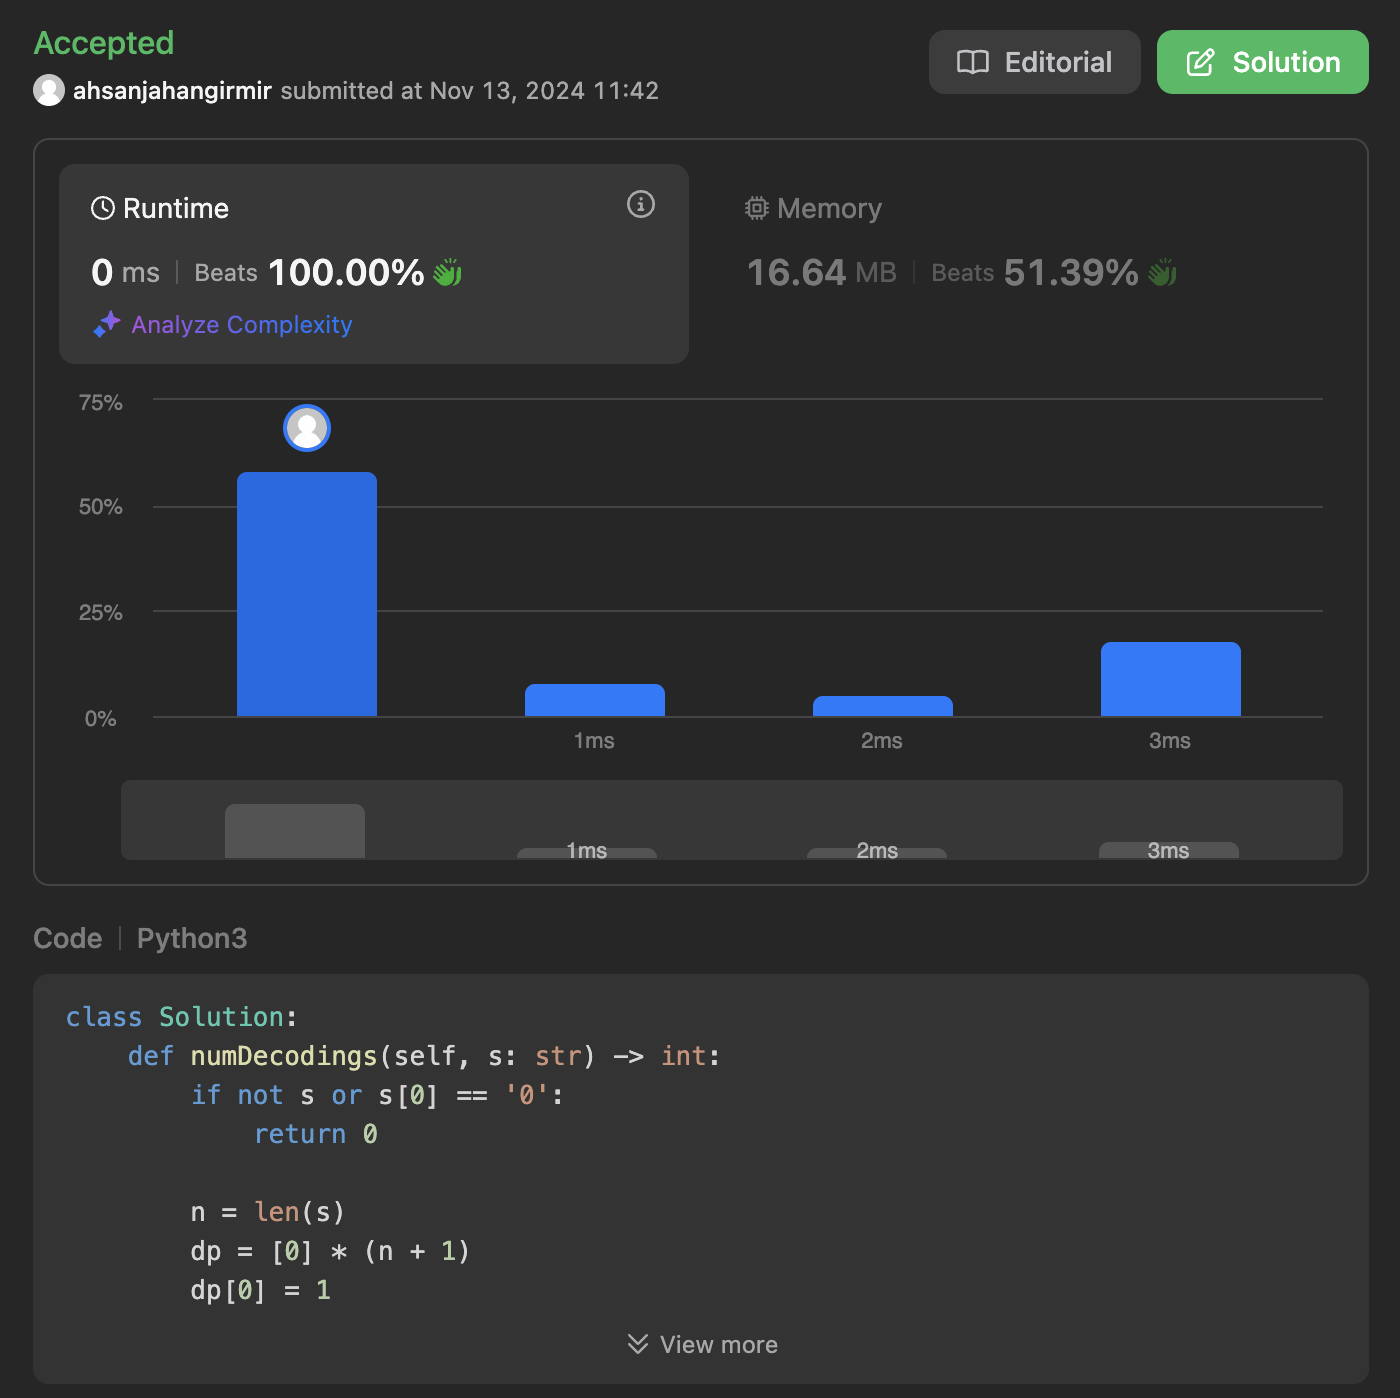

Thought Process / Reflection on challenges faced:

Though i was able to identify the problem as a DP one, where each character in the string represented a decision point, i still initially considered a recursive approach, but I later realized it would lead to redundant computations and poor performance and shifted to DP. The main challenge was handling edge cases, like substrings starting with '0' or invalid two-digit combinations. By using a DP array, I efficiently calculated the number of ways to decode the string up to each position, ensuring that both single and valid two-digit decodings were considered. This iterative approach helped me handle the constraints effectively while avoiding recursion pitfalls.

Time Complexity:  O(N)

Space Complexity: O(N)

Time taken: 38 minutes

**Problem 7:**
Target sum (20)


In [ ]:
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        n = len(nums)
        total_sum = sum(nums)
        
        offset = total_sum
        dp = [[0 for _ in range(2 * total_sum + 1)] for _ in range(n + 1)]
        dp[0][offset] = 1

        for i in range(1, n + 1):  
            for curr_sum in range(-total_sum, total_sum + 1):
                if dp[i - 1][curr_sum + offset] > 0:
                    dp[i][curr_sum + nums[i - 1] + offset] += dp[i - 1][curr_sum + offset]
                    dp[i][curr_sum - nums[i - 1] + offset] += dp[i - 1][curr_sum + offset]

        return dp[n][target + offset] if -total_sum <= target <= total_sum else 0

Proof of Acceptance / Attempt:

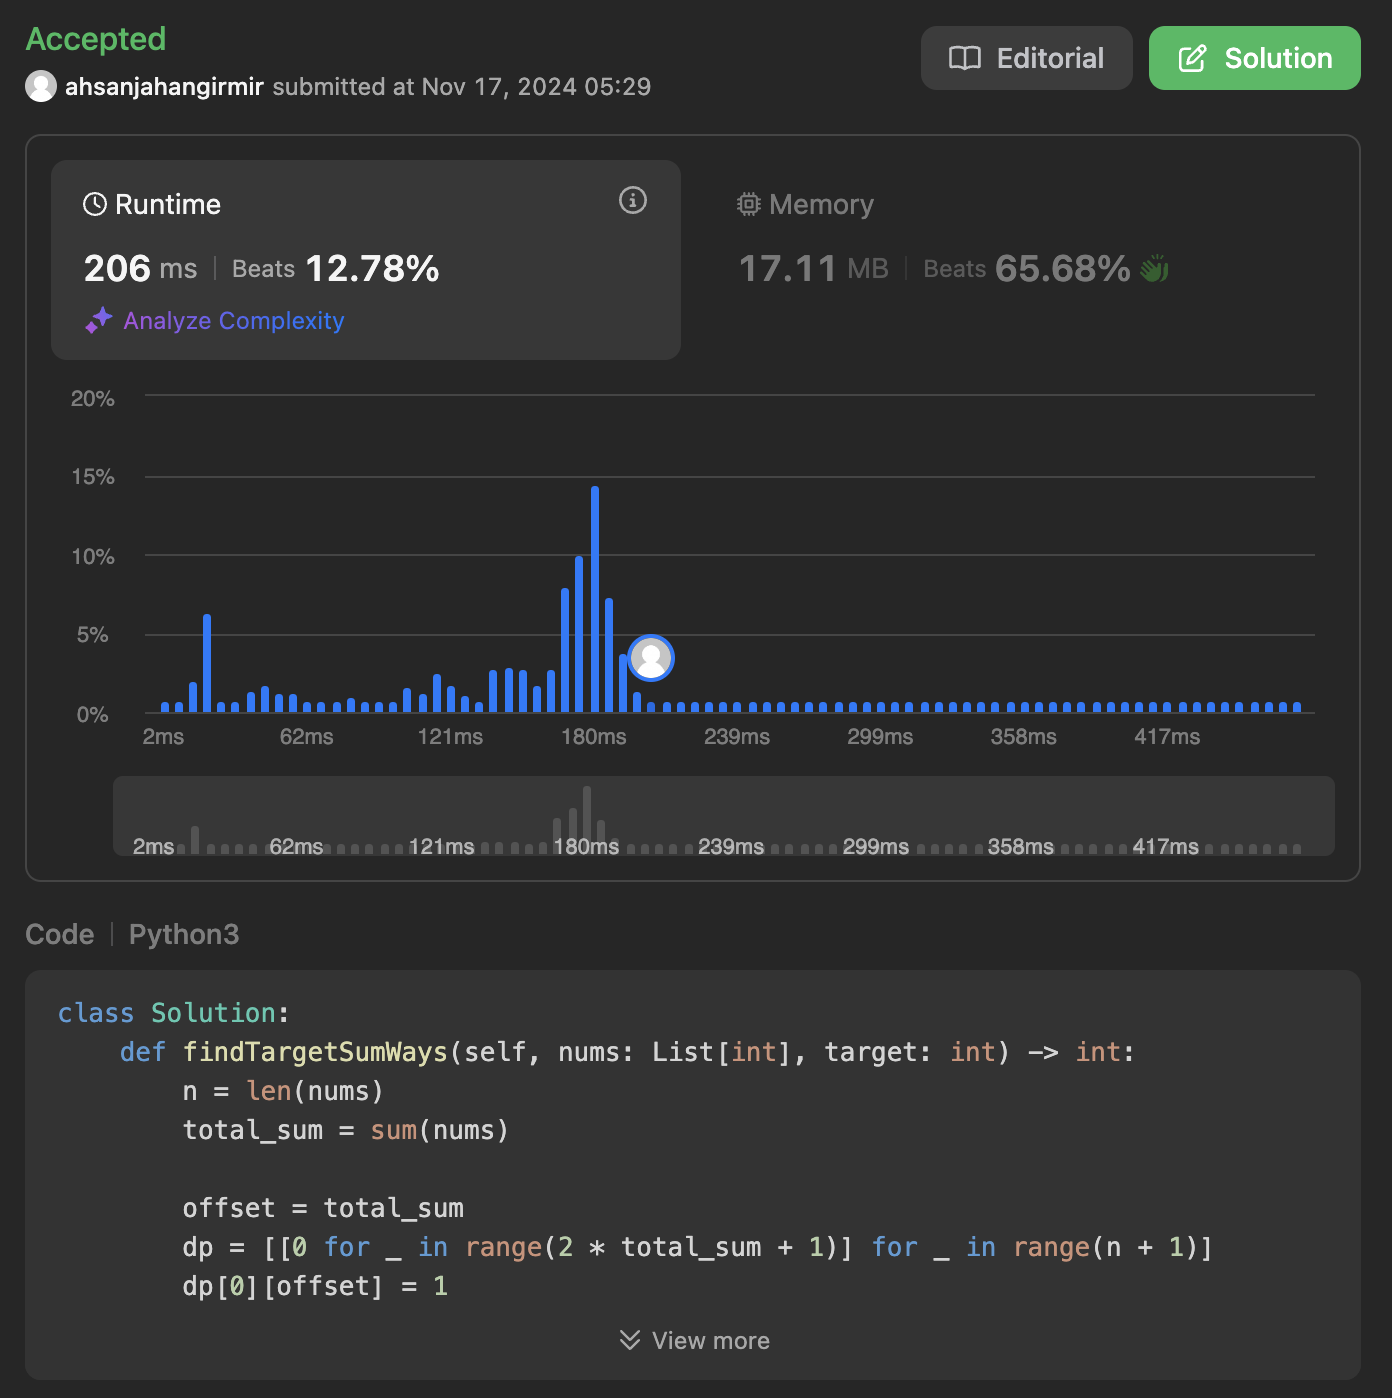

Thought Process / Reflection on challenges faced:

This problem took longer than usual because it was difficult to visualize the solution in my mind let alone writing a map/pseudo for it.The main challenge was managing the range of possible sums, including negative values, which led me to eventually use an offset to map all sums into a positive index. The DP table helped track the number of ways to achieve each sum at every step.

Time Complexity: O(N * S)  where N is the length of nums, and S is the sum of nums.

Space Complexity: O(N * S) where N is the length of nums, and S is the sum of nums.

Time taken: 57 minutes